In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

In [4]:
height

array([1.84617543, 1.7195476 , 1.85275263, ..., 1.59669981, 1.72585608,
       1.54860615])

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = len(y)
    e = y - tx.dot(w)
    return e.dot(e) / (2 * N)
    

# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i, j] = compute_loss(y, tx, np.array([w0, w1]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678245, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.014 seconds


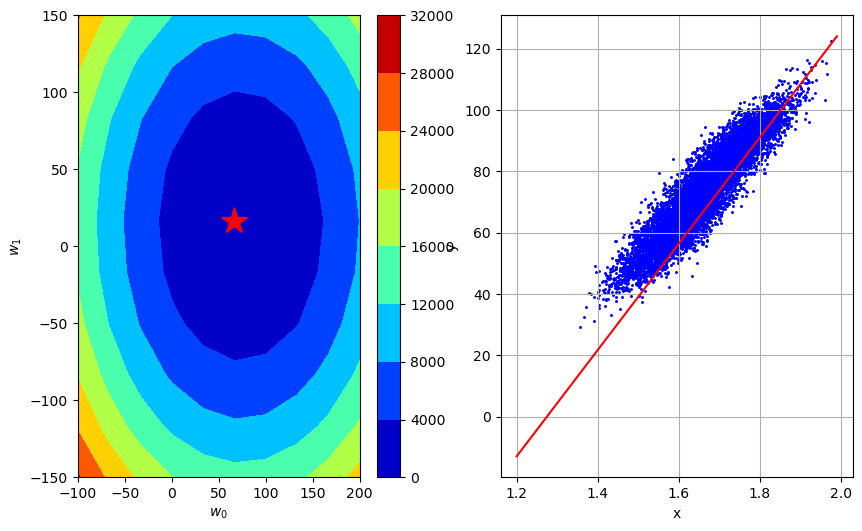

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    N = len(y)
    e = y - tx.dot(w)
    return -tx.T.dot(e) / N

Please fill in the functions `gradient_descent` below:

In [9]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
    
        w = w - gamma * grad

        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759165, w0=51.305745401473324, w1=9.435798704492441
GD iter. 1/49: loss=265.3024621089666, w0=66.69746902191562, w1=12.266538315840048
GD iter. 2/49: loss=37.878379550441835, w0=71.31498610804832, w1=13.115760199244335
GD iter. 3/49: loss=17.41021212017456, w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/49: loss=15.568077051450487, w0=73.11581777164008, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265314, w0=73.24049073296567, w1=13.469885724623941
GD iter. 6/49: loss=15.387363601208621, w0=73.27789262136332, w1=13.476764421879516
GD iter. 7/49: loss=15.386020684743551, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261653, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638314, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=15.385887965652195, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543448, w0=73.29388305071, w1=13.47970527131719

In [11]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [12]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    N = len(y)
    e = y - tx.dot(w)
    return -tx.T.dot(e) / N


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    N = len(y)

    for n_iter in range(max_iters):
        indices = np.random.choice(N, batch_size, replace=False)
        y_batch = y[indices]
        tx_batch = tx[indices]

        grad = compute_stoch_gradient(y_batch, tx_batch, w)
        
        w = w - gamma * grad # gamma is the lr
        ws.append(w)

        loss = compute_loss(y, tx, w)
        losses.append(loss)


        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [13]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2077.1180495017406, w0=9.161846603309229, w1=10.232986652147462
SGD iter. 1/49: loss=1734.9281514392965, w0=16.024265192759515, w1=26.099971389571035
SGD iter. 2/49: loss=1274.3776938637159, w0=23.132179322037437, w1=14.815071296287162
SGD iter. 3/49: loss=1000.7980705142554, w0=28.9390795866904, w1=15.343128543799716
SGD iter. 4/49: loss=846.8630356484659, w0=32.57374493657746, w1=15.675498242243322
SGD iter. 5/49: loss=695.3576145713373, w0=36.42374211302995, w1=12.749446488743981
SGD iter. 6/49: loss=596.614928411573, w0=39.3765351321381, w1=10.005673143548957
SGD iter. 7/49: loss=485.68289211172106, w0=42.62922858711424, w1=12.959533378901082
SGD iter. 8/49: loss=409.22219140625515, w0=45.51367093851386, w1=9.488439715832387
SGD iter. 9/49: loss=360.3384739548333, w0=47.59868346921682, w1=8.033623112367199
SGD iter. 10/49: loss=290.1366838778919, w0=50.567601833445636, w1=7.733760502567122
SGD iter. 11/49: loss=213.59480729174362, w0=53.704409542938734, w1=9.92

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [25]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************

# sub data without outliers
height_sub, weight_sub, gender_sub = load_data(sub_sample=True, add_outlier=False)

# sub data with outliers
height_ol, weight_ol, gender_ol = load_data(sub_sample=True, add_outlier=True)

x_sub, mean_x_sub, std_x_sub = standardize(height_sub)
y_sub, tx_sub = build_model_data(x_sub, weight_sub)

x_ol, mean_x_ol, std_x_ol = standardize(height_ol)
y_ol, tx_ol = build_model_data(x_ol, weight_ol)


#choose which one to use
y = y_ol
tx = tx_ol

height = height_ol
weight = weight_ol


In [26]:
y.shape, tx.shape

((202,), (202, 2))

In [27]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=318.28212470159644, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=88.64235561651282, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.97477639885523, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.05160722578589, w1=11.032481534481914
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889339, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.034889001593541
G

In [28]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [29]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    N = len(y)
    e = y - tx.dot(w)
    return -tx.T.dot(np.sign(e)) / N  # np.sign(e) is the subgrad of the MAE

In [30]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
   
        subgrad = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        w = w - gamma * subgrad    

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [33]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=2869.8351145358524, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=2818.2326504374055, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=2767.120186338956, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=2716.497722240507, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=2666.365258142059, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=2616.7227940436114, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=2567.570329945162, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=2518.907865846713, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=2470.7354017482644, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=2423.052937649816, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=2375.8604735513686, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=2329.15800945292, w0=8.4, w1=7.331429193108857e-15
SubGD ite

In [34]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [37]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    N = len(y)

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        indices = np.random.choice(N, batch_size, replace=False)
        y_batch = y[indices]
        tx_batch = tx[indices]

        subgrad = compute_subgradient_mae(y_batch, tx_batch, w)
        w = w - gamma * subgrad
        ws.append(w)
        loss = compute_loss(y, tx, w)
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [38]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=2817.658426859133, w0=0.7, w1=0.052160345529710626
SubSGD iter. 1/499: loss=2770.4504664387155, w0=1.4, w1=-0.2977775859506066
SubSGD iter. 2/499: loss=2715.983585714943, w0=2.0999999999999996, w1=0.04669066091986085
SubSGD iter. 3/499: loss=2657.9323262185017, w0=2.8, w1=0.7926763145072578
SubSGD iter. 4/499: loss=2612.3102484241085, w0=3.5, w1=0.4073921741791298
SubSGD iter. 5/499: loss=2567.2918393891136, w0=4.2, w1=0.0252661896287949
SubSGD iter. 6/499: loss=2524.3169544477564, w0=4.9, w1=-0.4797515421955273
SubSGD iter. 7/499: loss=2482.906669121165, w0=5.6000000000000005, w1=-1.0527616252101508
SubSGD iter. 8/499: loss=2417.794356504318, w0=6.300000000000001, w1=0.48730071317703505
SubSGD iter. 9/499: loss=2364.132803817499, w0=7.000000000000001, w1=1.1195751416587258
SubSGD iter. 10/499: loss=2319.273310312894, w0=7.700000000000001, w1=0.935414363340406
SubSGD iter. 11/499: loss=2277.5149493553376, w0=8.4, w1=0.5036217850569855
SubSGD iter. 12/499: loss=

In [39]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>